In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/laptop-price-prediction-cleaned-dataset/laptop_data_cleaned.csv


In [2]:
df = pd.read_csv('/kaggle/input/laptop-price-prediction-cleaned-dataset/laptop_data_cleaned.csv')

In [3]:
df.head()

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
0,Apple,Ultrabook,8,1.37,11.175755,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,10.776777,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,10.329931,0,0,141.211998,Intel Core i5,0,256,Intel,Others
3,Apple,Ultrabook,16,1.83,11.814476,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,11.473101,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [4]:
df.tail(10)

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
1263,Dell,Notebook,2,2.20,9.913097,0,0,100.454670,Other Intel Processor,500,0,Intel,Windows
1264,Lenovo,Notebook,8,2.60,10.776844,0,1,141.211998,Intel Core i7,1000,0,Nvidia,Windows
1265,HP,Notebook,6,2.04,10.285461,0,0,141.211998,AMD Processor,0,0,AMD,Windows
1266,Dell,Notebook,8,2.30,10.667632,0,0,100.454670,Intel Core i7,1000,0,AMD,Others
1267,HP,Netbook,2,1.17,9.317895,0,0,135.094211,Other Intel Processor,0,0,Intel,Windows
1268,Asus,Notebook,4,2.20,10.555257,0,0,100.454670,Intel Core i7,500,0,Nvidia,Windows
1269,Lenovo,2 in 1 Convertible,4,1.80,10.433899,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1270,Lenovo,2 in 1 Convertible,16,1.30,11.288115,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1271,Lenovo,Notebook,2,1.50,9.409283,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows
1272,HP,Notebook,6,2.19,10.614129,0,0,100.454670,Intel Core i7,1000,0,AMD,Windows


In [5]:
df.shape

(1273, 13)

In [6]:
df.columns

Index(['Company', 'TypeName', 'Ram', 'Weight', 'Price', 'TouchScreen', 'Ips',
       'Ppi', 'Cpu_brand', 'HDD', 'SSD', 'Gpu_brand', 'Os'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1273 entries, 0 to 1272
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1273 non-null   object 
 1   TypeName     1273 non-null   object 
 2   Ram          1273 non-null   int64  
 3   Weight       1273 non-null   float64
 4   Price        1273 non-null   float64
 5   TouchScreen  1273 non-null   int64  
 6   Ips          1273 non-null   int64  
 7   Ppi          1273 non-null   float64
 8   Cpu_brand    1273 non-null   object 
 9   HDD          1273 non-null   int64  
 10  SSD          1273 non-null   int64  
 11  Gpu_brand    1273 non-null   object 
 12  Os           1273 non-null   object 
dtypes: float64(3), int64(5), object(5)
memory usage: 129.4+ KB


In [8]:
df.isna().sum()

Company        0
TypeName       0
Ram            0
Weight         0
Price          0
TouchScreen    0
Ips            0
Ppi            0
Cpu_brand      0
HDD            0
SSD            0
Gpu_brand      0
Os             0
dtype: int64

In [9]:
df.isnull().sum()

Company        0
TypeName       0
Ram            0
Weight         0
Price          0
TouchScreen    0
Ips            0
Ppi            0
Cpu_brand      0
HDD            0
SSD            0
Gpu_brand      0
Os             0
dtype: int64

In [10]:
df.describe()

,Ram,Weight,Price,TouchScreen,Ips,Ppi,HDD,SSD
count,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000
mean,8.447761,2.041100,10.828218,0.146897,0.279654,146.950812,413.715632,186.252946
std,5.098771,0.669241,0.619565,0.354142,0.449006,42.926775,518.054486,186.531571
min,2.000000,0.690000,9.134616,0.000000,0.000000,90.583402,0.000000,0.000000
25%,4.000000,1.500000,10.387379,0.000000,0.000000,127.335675,0.000000,0.000000
50%,8.000000,2.040000,10.872255,0.000000,0.000000,141.211998,0.000000,256.000000
75%,8.000000,2.310000,11.287447,0.000000,1.000000,157.350512,1000.000000,256.000000
max,64.000000,4.700000,12.691441,1.000000,1.000000,352.465147,2000.000000,1024.000000


In [11]:
df.describe(include="all")

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
count,1273,1273,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273,1273.000000,1273.000000,1273,1273
unique,19,6,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,3,3
top,Dell,Notebook,NaN,NaN,NaN,NaN,NaN,NaN,Intel Core i7,NaN,NaN,Intel,Windows
freq,291,706,NaN,NaN,NaN,NaN,NaN,NaN,515,NaN,NaN,703,1100
mean,NaN,NaN,8.447761,2.041100,10.828218,0.146897,0.279654,146.950812,NaN,413.715632,186.252946,NaN,NaN
std,NaN,NaN,5.098771,0.669241,0.619565,0.354142,0.449006,42.926775,NaN,518.054486,186.531571,NaN,NaN
min,NaN,NaN,2.000000,0.690000,9.134616,0.000000,0.000000,90.583402,NaN,0.000000,0.000000,NaN,NaN
25%,NaN,NaN,4.000000,1.500000,10.387379,0.000000,0.000000,127.335675,NaN,0.000000,0.000000,NaN,NaN
50%,NaN,NaN,8.000000,2.040000,10.872255,0.000000,0.000000,141.211998,NaN,0.000000,256.000000,NaN,NaN
75%,NaN,NaN,8.000000,2.310000,11.287447,0.000000,1.000000,157.350512,NaN,1000.000000,256.000000,NaN,NaN


In [12]:
df.corr

<bound method DataFrame.corr of      Company            TypeName  Ram  Weight      Price  TouchScreen  Ips  \
0      Apple           Ultrabook    8    1.37  11.175755            0    1   
1      Apple           Ultrabook    8    1.34  10.776777            0    0   
2         HP            Notebook    8    1.86  10.329931            0    0   
3      Apple           Ultrabook   16    1.83  11.814476            0    1   
4      Apple           Ultrabook    8    1.37  11.473101            0    1   
...      ...                 ...  ...     ...        ...          ...  ...   
1268    Asus            Notebook    4    2.20  10.555257            0    0   
1269  Lenovo  2 in 1 Convertible    4    1.80  10.433899            1    1   
1270  Lenovo  2 in 1 Convertible   16    1.30  11.288115            1    1   
1271  Lenovo            Notebook    2    1.50   9.409283            0    0   
1272      HP            Notebook    6    2.19  10.614129            0    0   

             Ppi              C

In [13]:
df['Company'].value_counts()

Dell         291
Lenovo       289
HP           268
Asus         151
Acer         101
MSI           54
Toshiba       48
Apple         21
Samsung        8
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: Company, dtype: int64

In [14]:
df['Company'].value_counts(normalize=True)

Dell         0.228594
Lenovo       0.227023
HP           0.210526
Asus         0.118617
Acer         0.079340
MSI          0.042419
Toshiba      0.037706
Apple        0.016496
Samsung      0.006284
Razer        0.005499
Mediacom     0.005499
Microsoft    0.004713
Xiaomi       0.003142
Vero         0.003142
Chuwi        0.002357
Google       0.002357
Fujitsu      0.002357
LG           0.002357
Huawei       0.001571
Name: Company, dtype: float64

In [15]:
df['Os'].value_counts()

Windows    1100
Others      152
Mac          21
Name: Os, dtype: int64

In [16]:
avgPricebyComapny = df.groupby('Company')['Price'].aggregate('mean')
avgPricebyComapny

Company
Acer         10.301821
Apple        11.274645
Asus         10.797073
Chuwi         9.683992
Dell         10.924479
Fujitsu      10.563592
Google       11.374981
HP           10.805129
Huawei       11.235397
LG           11.621737
Lenovo       10.779085
MSI          11.383340
Mediacom      9.645522
Microsoft    11.305010
Razer        11.940528
Samsung      11.173723
Toshiba      11.044669
Vero          9.351166
Xiaomi       10.995970
Name: Price, dtype: float64

Separating Mac Operating System Supported Laptops

In [17]:
avgPricebyOs = df.groupby('Os')['Price'].aggregate('mean')
avgPricebyOs

Os
Mac        11.274645
Others     10.242865
Windows    10.900581
Name: Price, dtype: float64

In [18]:
avgPricebyTypeName = df.groupby('TypeName')['Price'].aggregate('mean')
avgPricebyTypeName

TypeName
2 in 1 Convertible    11.011526
Gaming                11.340699
Netbook               10.157738
Notebook              10.513711
Ultrabook             11.275749
Workstation           11.666833
Name: Price, dtype: float64

In [19]:
df.sort_values('Price',ascending=False)
#.groupby('Company')['Price'].aggregate('mean')

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
196,Razer,Gaming,32,3.49,12.691441,1,0,254.671349,Intel Core i7,0,1000,Nvidia,Windows
830,Razer,Gaming,32,3.49,12.587883,1,0,254.671349,Intel Core i7,0,512,Nvidia,Windows
610,Lenovo,Notebook,32,2.50,12.472347,0,1,282.423996,Other Intel Processor,0,1000,Nvidia,Windows
749,HP,Workstation,16,3.00,12.362418,0,1,127.335675,Other Intel Processor,0,256,Nvidia,Windows
1066,Asus,Gaming,64,3.58,12.263341,0,1,127.335675,Intel Core i7,0,1000,Nvidia,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,Acer,Notebook,2,2.19,9.268866,0,0,100.454670,Other Intel Processor,0,16,Intel,Others
31,Asus,Notebook,2,1.65,9.268866,0,0,111.935204,AMD Processor,0,0,AMD,Windows
1120,Vero,Notebook,4,1.35,9.253676,0,0,165.632118,Other Intel Processor,0,0,Intel,Windows
20,Asus,Netbook,2,0.98,9.232535,0,0,135.094211,Other Intel Processor,0,0,Intel,Windows


Max Amount & Max amount Laptop

In [20]:
df['Price'].aggregate('max')

12.69144112852859

In [21]:
df[df['Price']==df['Price'].aggregate('max')]

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
196,Razer,Gaming,32,3.49,12.691441,1,0,254.671349,Intel Core i7,0,1000,Nvidia,Windows


Min Amount & Min amount Laptop

In [22]:
df['Price'].aggregate('min')

9.134616325446665

In [23]:
df[df['Price']==df['Price'].aggregate('min')]

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
1214,Acer,Netbook,2,1.3,9.134616,0,0,135.094211,Other Intel Processor,0,32,Intel,Others


Laptops Price over Average Price 

In [24]:
df['Price'].aggregate('mean')

10.828218230869608

In [25]:
df[df['Price']>df['Price'].aggregate('mean')]

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
0,Apple,Ultrabook,8,1.37,11.175755,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
3,Apple,Ultrabook,16,1.83,11.814476,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,11.473101,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
6,Apple,Ultrabook,16,2.04,11.644108,0,1,220.534624,Intel Core i7,0,0,Intel,Mac
7,Apple,Ultrabook,8,1.34,11.030615,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1248,Dell,2 in 1 Convertible,8,1.24,11.478299,1,0,276.053530,Intel Core i5,0,256,Intel,Windows
1252,Lenovo,Notebook,8,1.90,10.952842,0,1,157.350512,Intel Core i5,0,256,Intel,Windows
1255,Asus,Gaming,16,4.00,11.525170,0,1,127.335675,Intel Core i7,1000,128,Nvidia,Windows
1258,MSI,Gaming,8,2.40,11.089517,0,0,141.211998,Intel Core i7,1000,128,Nvidia,Windows


In [26]:
#df.groupby('Company')['Price'].agg('mean')
df.groupby('Company').agg({'Price':'mean'})

,Price
Company,
Acer,10.301821
Apple,11.274645
Asus,10.797073
Chuwi,9.683992
Dell,10.924479
Fujitsu,10.563592
Google,11.374981
HP,10.805129
Huawei,11.235397


In [27]:
df.groupby(['Company','Os']).agg({'Price':'mean'})

Price
Company   Os                
Acer      Others    9.970749
          Windows  10.410726
Apple     Mac      11.274645
Asus      Others   10.295495
          Windows  10.860706
Chuwi     Windows   9.683992
Dell      Others   10.420591
          Windows  10.993370
Fujitsu   Windows  10.563592
Google    Others   11.374981
HP        Others    9.952595
          Windows  10.859258
Huawei    Windows  11.235397
LG        Windows  11.621737
Lenovo    Others   10.226887
          Windows  10.900242
MSI       Windows  11.383340
Mediacom  Windows   9.645522
Microsoft Windows  11.305010
Razer     Windows  11.940528
Samsung   Others    9.570272
          Windows  11.402788
Toshiba   Windows  11.044669
Vero      Windows   9.351166
Xiaomi    Others   11.055924
          Windows  10.816108

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
Os_Price = df.groupby('Os').agg({'Price':'mean'}).sort_values('Price')
Os_Price

,Price
Os,
Others,10.242865
Windows,10.900581
Mac,11.274645


<BarContainer object of 3 artists>

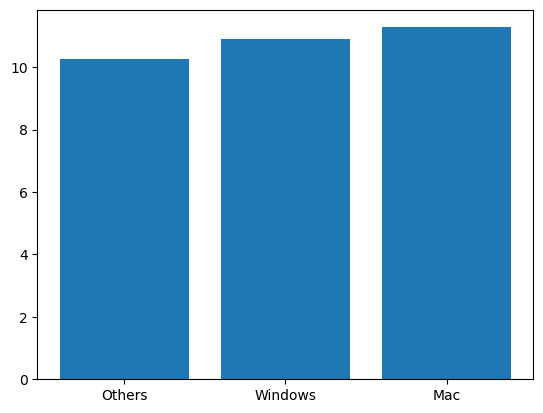

In [30]:
plt.bar(x=Os_Price.index, height = Os_Price['Price'])

<Axes: xlabel='Os', ylabel='count'>

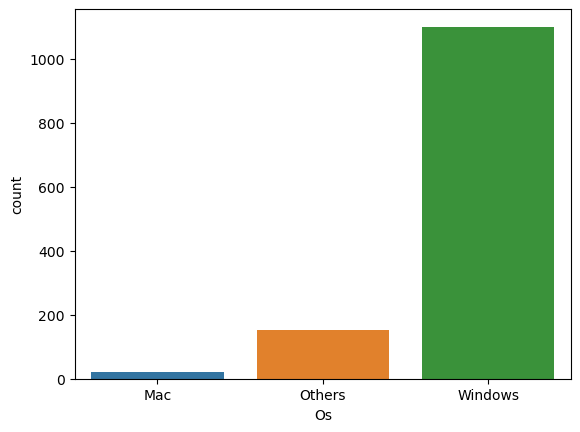

In [31]:
sns.countplot(data=df,x='Os')

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Intel Core i5'),
  Text(1, 0, 'Intel Core i7'),
  Text(2, 0, 'AMD Processor'),
  Text(3, 0, 'Intel Core i3'),
  Text(4, 0, 'Other Intel Processor')])

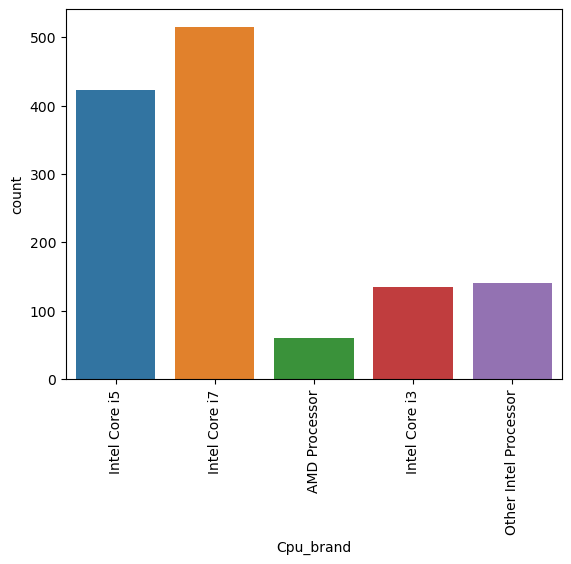

In [32]:
sns.countplot(data=df,x='Cpu_brand')
plt.xticks(rotation=90)

In [33]:
Mac_Os = df[df['Os']=='Mac']

In [34]:
Mac_Os.shape

(21, 13)

In [35]:
Mac_Os

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
0,Apple,Ultrabook,8,1.37,11.175755,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,10.776777,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
3,Apple,Ultrabook,16,1.83,11.814476,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,11.473101,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
6,Apple,Ultrabook,16,2.04,11.644108,0,1,220.534624,Intel Core i7,0,0,Intel,Mac
7,Apple,Ultrabook,8,1.34,11.030615,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
12,Apple,Ultrabook,16,1.83,11.775302,0,1,220.534624,Intel Core i7,0,256,AMD,Mac
14,Apple,Ultrabook,8,0.92,11.116331,0,1,226.415547,Other Intel Processor,0,256,Intel,Mac
15,Apple,Ultrabook,8,1.37,11.301072,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
17,Apple,Ultrabook,16,1.83,11.933438,0,1,220.534624,Intel Core i7,0,512,AMD,Mac


Hypothesis Testing: 8 GB Ram Supported Mac Laptops are more in Price than Others 

H0: 8_GBRamPrice <= Other_RamPrice 

H1: 8_GBRamPrice > Other_RamPrice

In [36]:
from scipy import stats as sts
import math

In [37]:
Num_8GB = (Mac_Os['Ram']==8).sum()
Num_8GB

16

In [38]:
Num_other = Mac_Os.shape[0] - Num_8GB
Num_other

5

In [39]:
avg_price_Ram = Mac_Os.groupby('Ram')['Price'].mean()
avg_price_Ram

Ram
4     10.841452
8     11.172423
16    11.791831
Name: Price, dtype: float64

In [40]:
avg_price_8GBRam = avg_price_Ram[8]

In [41]:
avg_price_RamOther = avg_price_Ram[4] + avg_price_Ram[16]
avg_price_RamOther

22.633283224739696

In [42]:
std_8GBRam = Mac_Os[Mac_Os['Ram']==8]['Price'].std()

In [43]:
std_8GBRam

0.2302217766520625

In [44]:
std_OtherRam = Mac_Os[Mac_Os['Ram']!=8]['Price'].std()
std_OtherRam

0.4373891090624365

In [45]:
std_population = ((Num_8GB-1)*math.pow(std_8GBRam,2) + (Num_other-1)*math.pow(std_OtherRam,2))/(Num_8GB+Num_other-2)
std_population

0.08211936460937948

In [46]:
t_tab = sts.t.ppf(q=1-0.05,df=(16+5-2))
t_tab

1.729132811521367

If t_cal is > t_tab (1.729138) null hypothesis will be rejected

In [47]:
t_cal = (avg_price_8GBRam-avg_price_RamOther) / math.sqrt((std_population/Num_8GB)+(std_population/Num_other))

In [48]:
t_cal

-78.06021741874515

In [49]:
if t_cal > t_tab:
    print("In 95% confidence level null hypothesis can be rejected")
else:
    print("Null hypothesis can not be rejected")

Null hypothesis can not be rejected


So 8 GB Ram Mac Laptop is not higher in price than other ram laptops

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression